In [4]:
# train, validation, test 폴더로 이미지 복사

import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'      # 소규모 dataset 저장할 디렉터리
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')      # train images 저장할 디렉터리
os.mkdir(train_dir)
train_cats_dir = os.path.join(train_dir, 'cats') # train images (cats) 저장할 디렉터리
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') # train images (dogs) 저장할 디렉터리
os.mkdir(train_dogs_dir)

validation_dir = os.path.join(base_dir, 'validation')      # validation images 저장할 디렉터리
os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') # validation images (cats) 저장할 디렉터리
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # validation images (dogs) 저장할 디렉터리
os.mkdir(validation_dogs_dir)

test_dir = os.path.join(base_dir, 'test')      # test images 저장할 디렉터리
os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'cats') # test images (cats) 저장할 디렉터리
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') # test images (dogs) 저장할 디렉터리
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]    # 1,000개 images (cats)를 train_cats_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] # 500개 images (cats)를 validation_cats_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] # 500개 images (cats)를 test_cats_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(0, 1000)]    # 1,000개 images (dogs)를 train_dogs_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] # 500개 images (dogs)를 validation_dogs_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] # 500개 images (dogs)를 test_dogs_dir에 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# cat vs dog 분류를 위한 소규모 Convnet 생성

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [7]:
# 데이터 전처리

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기: ', data_batch.shape)
    print('배치 레이블 크기: ', labels_batch.shape)
    break

배치 데이터 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20,)


In [10]:
# 모델 훈련

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 54s 543ms/step - loss: 0.6948 - acc: 0.5240 - val_loss: 0.6821 - val_acc: 0.5900
Epoch 2/30
100/100 [==============================] - 52s 516ms/step - loss: 0.6649 - acc: 0.5980 - val_loss: 0.6850 - val_acc: 0.5510
Epoch 3/30
100/100 [==============================] - 51s 513ms/step - loss: 0.6319 - acc: 0.6510 - val_loss: 0.7878 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 52s 522ms/step - loss: 0.5911 - acc: 0.6900 - val_loss: 0.6589 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 53s 525ms/step - loss: 0.5558 - acc: 0.7110 - val_loss: 0.5358 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 51s 514ms/step - loss: 0.5181 - acc: 0.7440 - val_loss: 0.5114 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 51s 512ms/step - loss: 0.4931 - acc: 0.7560 - val_loss: 0.6853 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 5

In [11]:
# 모델 저장

model.save('cats_and_dogs_small_1.h5')

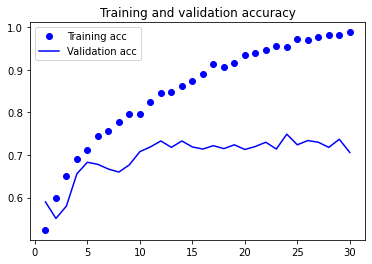

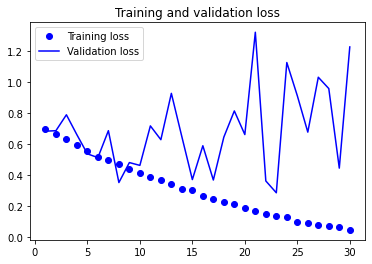

In [12]:
# 결과 그래프 시각화

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# 데이터 증식 설정

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

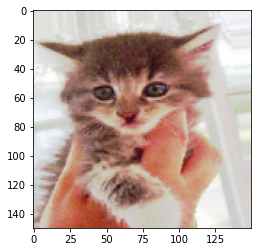

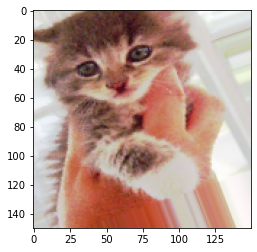

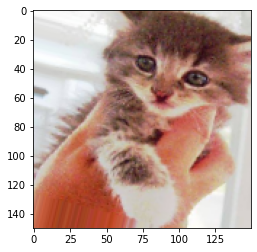

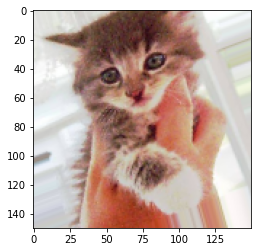

In [14]:
# 데이터 증식
# 랜덤하게 증식된 train image 그리기

from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [15]:
# Dropout 포함한 새로운 Convnet 정의

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [17]:
# Data augmentation, Dropout 사용하여 모델 훈련

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    rescale=1./255                   # validation data는 증식되면 안 됨
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 80s 802ms/step - loss: 0.6884 - acc: 0.5369 - val_loss: 0.6587 - val_acc: 0.5673
Epoch 2/100
100/100 [==============================] - 79s 790ms/step - loss: 0.6735 - acc: 0.5688 - val_loss: 0.7780 - val_acc: 0.5586
Epoch 3/100
100/100 [==============================] - 83s 827ms/step - loss: 0.6547 - acc: 0.6036 - val_loss: 0.7076 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 82s 817ms/step - loss: 0.6289 - acc: 0.6394 - val_loss: 0.5670 - val_acc: 0.6772
Epoch 5/100
100/100 [==============================] - 81s 807ms/step - loss: 0.6135 - acc: 0.6553 - val_loss: 0.6099 - val_acc: 0.6212
Epoch 6/100
100/100 [==============================] - 83s 827ms/step - loss: 0.6099 - acc: 0.6614 - val_loss: 0.5450 - val_acc: 0.6778
Epoch 7/100
100/100 [==============================] - 81s 813ms/step - loss: 0.5928 - acc: 0.6818 -

In [18]:
# 모델 저장

model.save('cats_and_dogs_small_2.h5')

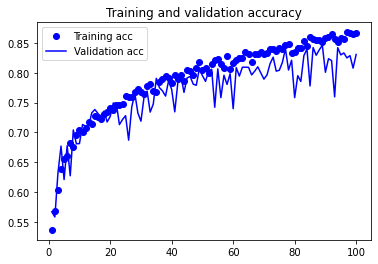

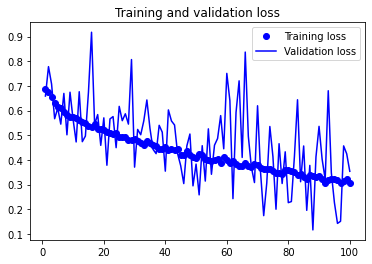

In [19]:
# 결과 그래프 시각화

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
# 모델 로드

from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')

model.summary()

Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [28]:
# cats and dogs prediction
# 이미지 결과
# 실행 분석

# dog 1

from keras.preprocessing import image
from keras import models
import numpy as np
import matplotlib.pyplot as plt

img_path = './datasets/cats_and_dogs_small/test/dog1_pomeranian.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# plt.imshow(dog_tensor[0])             # test image (dog) 출력
# plt.show()

prediction = model.predict(img_tensor)
print(prediction)

[[0.9962016]]


In [30]:
# heatmap 출력



0

In [37]:
# Conv2D_4 필터 시각화

from keras import backend as K

# loss tensor 정의
layer_name = 'conv2d_12'            # conv2d_4
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

# input에 대한 loss gradient 계산
grads = K.gradients(loss, model.input)[0]

# gradient 정규화
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# input 값에 대한 numpy output 값 추출
iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

# 확률적 경사 상승법을 사용한 loss 최대화
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step

In [38]:
# tensor를 image 형태로 변환하기 위한 유틸리티 함수

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

In [53]:
# 필터 시각화 image 만드는 함수

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])

        input_img_data += grads_value * step
    
    img = input_img_data[0]
    
    return deprocess_image(img)

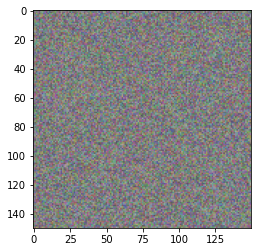

In [50]:
plt.imshow(generate_pattern('conv2d_12', 0))
plt.show()

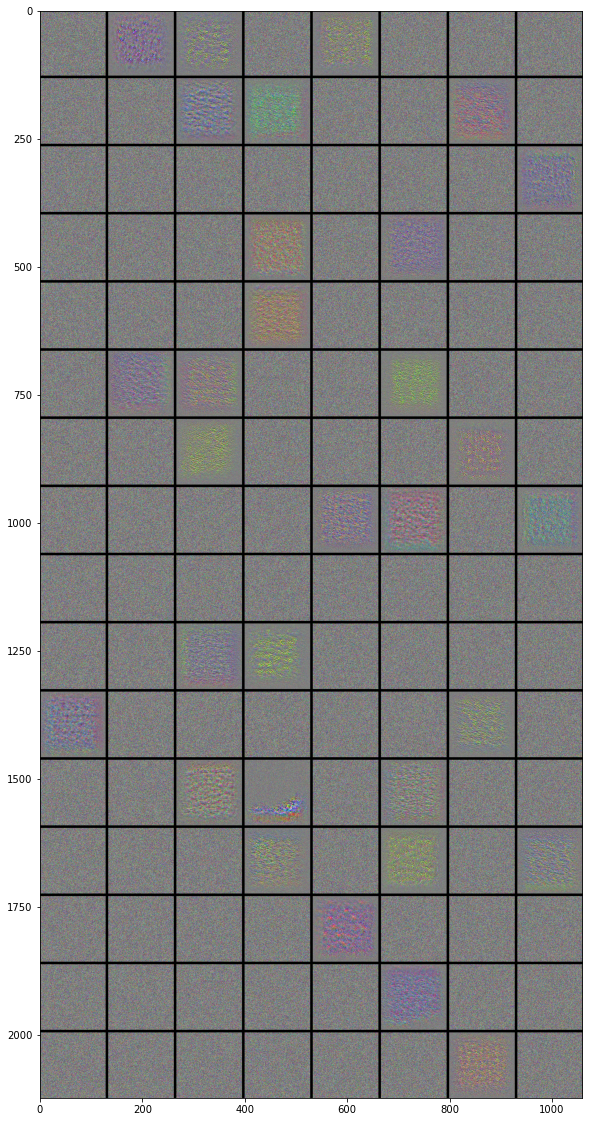

In [57]:
# layer에 있는 각 filter에 반응하는 pattern 생성

# 마지막 layer 필터 시각화

layer_name = 'conv2d_12'
size = 128
margin = 5

# 8 * 16 = 128
# 64 * 2 = 128
results = np.zeros((16 * size + 15 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

for i in range(0, 16):
    for j in range(0, 8):
        filter_img = generate_pattern(layer_name, i + (j * 16), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        
        results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()